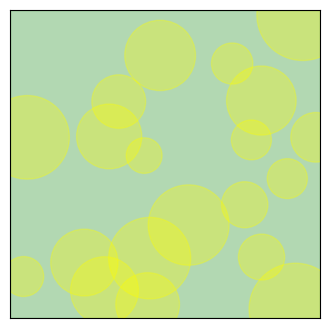

In [70]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 画一个绿色的矩形代表农田，在其中画出按规则排列的绿点代表作物
fig, ax = plt.subplots(figsize=(4, 4))

# 画一个绿色的矩形代表农田
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='green', alpha=0.3))

# 存储已有的杂草区域
weeds = []

# 画出随机大小、随机透明度的黄色圆形代表杂草区域
for i in range(20):
    while True:
        x = random.random()  # 确保圆心在显示范围内
        y = random.random()  # 确保圆心在显示范围内
        r = random.random() * 0.1+ 0.05 
        alpha = 0.3
        
        # 检查新生成的杂草区域是否与已有的杂草区域重叠
        overlap = False
        for weed in weeds:
            distance = np.sqrt((x - weed[0])**2 + (y - weed[1])**2)
            if distance < (r):
                overlap = True
                break
        
        if not overlap:
            weeds.append((x, y, r))
            circle = plt.Circle((x, y), r, color='yellow', alpha=alpha)
            ax.add_patch(circle)
            break
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()



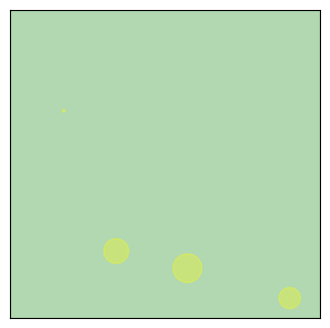

In [71]:
# 类似上面代码的demo，我想用扩散方式模拟杂草生长的过程
# 画一个绿色的矩形代表农田
fig, ax = plt.subplots(figsize=(4, 4))
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='green', alpha=0.3))

# 存储已有的杂草区域
weeds = []

# 画出随机大小、随机透明度的黄色圆形代表杂草区域
for i in range(5):
    while True:
        x = random.random()  # 确保圆心在显示范围内
        y = random.random()  # 确保圆心在显示范围内
        r = random.random() * 0.05
        alpha = 0.3
        
        # 检查新生成的杂草区域是否与已有的杂草区域重叠
        overlap = False
        for weed in weeds:
            distance = np.sqrt((x - weed[0])**2 + (y - weed[1])**2)
            if distance < (r):
                overlap = True
                break
        
        if not overlap:
            weeds.append((x, y, r))
            circle = plt.Circle((x, y), r, color='yellow', alpha=alpha)
            ax.add_patch(circle)
            break
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

覆盖面积占总比例: 21.95%
覆盖面积*占有强度的总值: 0.1372


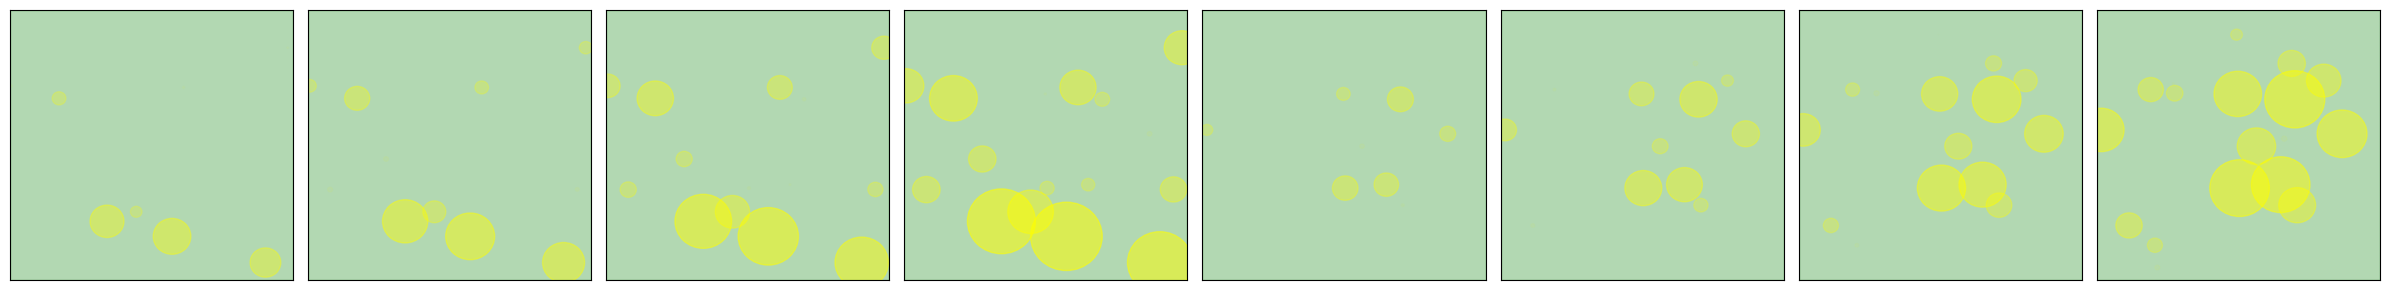

In [72]:
from shapely.geometry import Point
from shapely.ops import unary_union

# 固定随机种子数组
random_seeds = [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 666]
np_random_seeds = [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 666]
random_seeds = [x + 7654321 for x in random_seeds]
np_random_seeds = [x + 7654321 for x in np_random_seeds]

# 创建一个包含 1 行 8 列的子图
fig, axes = plt.subplots(1, 8, figsize=(24, 3))

# 将axes展平成一维数组，方便后续遍历
axes = axes.flatten()

alpha_plus = 0

for stage in range(1, 9):
    ax = axes[stage - 1]

    # 画一个绿色的矩形代表农田
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='green', alpha=0.3+alpha_plus))

    # 将已有的杂草区域全部扩大（r增大）
    for i in range(len(weeds)):
        x, y, r = weeds[i]
        if r < 0.08:
            r += 0.02
        else:
            r += 0.02
        # 正常情况：0.02，0.02
        # 强生物防治：0.015，0.01
        # 弱生物防治：0.02，0.015
        weeds[i] = (x, y, r)
        circle = plt.Circle((x, y), r, color='yellow', alpha=math.sqrt(r)*1.5)
        # 弱生物防治情况：math.sqrt(r)/1.5-r+0.1
        # 强生物防治情况：math.sqrt(r)/2
        # 正常情况：math.sqrt(r)*1.5
        ax.add_patch(circle)

    # if len(weeds) < 12:
    #     new_weeds_area_num = 5
    # else:
    new_weeds_area_num = 3
    
    # 增加新的杂草区域
    for i in range(new_weeds_area_num):
        # 设置随机种子
        random.seed(random_seeds[stage * 3 + i])
        np.random.seed(np_random_seeds[stage * 3 + i])
        
        while True:
            x = random.random()  # 确保圆心在显示范围内
            y = random.random()  # 确保圆心在显示范围内
            r = random.random() * 0.01
            alpha = math.sqrt(r)/2

            # 检查新生成的杂草区域是否与已有的杂草区域重叠
            overlap = False
            for weed in weeds:
                distance = np.sqrt((x - weed[0]) ** 2 + (y - weed[1]) ** 2)
                if distance < (r + weed[2]):
                    overlap = True
                    break

            if not overlap:
                weeds.append((x, y, r))
                circle = plt.Circle((x, y), r, color='yellow', alpha=alpha)
                ax.add_patch(circle)
                break
            
    # 使用物理方式防治
    # 清除半径大于0.05的杂草区（圆）
    if  stage == 4 :
        weeds = [weed for weed in weeds if weed[2] <= 0.04]
    
    # 使用化学方式防治
    # stage = 3, stage =6时，清除所有杂草区
    # if stage == 4:
    #     weeds = []
    #     alpha_plus += 0.1
    
    # 使用生物方式防治
        

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    
# 计算所有圆的覆盖面积占总比例，以及覆盖面积*占有强度（不透明度值）的总值
total_area = 1 * 1  # 农田总面积

# 计算所有圆的覆盖面积，考虑交叉部分
def calculate_covered_area(weeds):

    circles = [Point(weed[0], weed[1]).buffer(weed[2]) for weed in weeds]
    union = unary_union(circles)
    return union.area

covered_area = calculate_covered_area(weeds)
coverage_ratio = covered_area / total_area

# 计算覆盖面积*占有强度（不透明度值）的总值
coverage_intensity = sum([math.pi * weed[2]**2 * (math.sqrt(weed[2])*2) for weed in weeds])

print(f"覆盖面积占总比例: {coverage_ratio:.2%}")
print(f"覆盖面积*占有强度的总值: {coverage_intensity:.4f}")

plt.tight_layout()
plt.show()
